In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100}
    - KNN Classfier
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50}
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat.
  - Include documentation for your code

In [2]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",
                   sheet_name = 0, skiprows= 1, header = 0)

In [3]:
#df.loc[df.index[3329],"BILL_AMT6"]
df.iloc[3330]

ID                             3331
LIMIT_BAL                     50000
SEX                               1
EDUCATION                         2
MARRIAGE                          2
AGE                              29
PAY_0                             1
PAY_2                             2
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                     49612
BILL_AMT2                     48546
BILL_AMT3                     49157
BILL_AMT4                     49890
BILL_AMT5                     48941
BILL_AMT6                     49940
PAY_AMT1                          0
PAY_AMT2                       1900
PAY_AMT3                       1333
PAY_AMT4                          0
PAY_AMT5                        999
PAY_AMT6                          0
default payment next month        0
Name: 3330, dtype: int64

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
max(df.loc[:,"PAY_0"])

8

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [10]:
# split data int training and testing, 80 : 20
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)

In [11]:
# preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

In [12]:
print(df.columns.values)

['ID' 'LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2'
 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3'
 'BILL_AMT4' 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3'
 'PAY_AMT4' 'PAY_AMT5' 'PAY_AMT6' 'default payment next month']


In [13]:
from sklearn.compose import ColumnTransformer
num_attribs = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [14]:
y_train = train_set["default payment next month"]

In [17]:
# grid search for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42)),
])
param_grid = {
    'random_forest__n_estimators': [3, 4, 6, 7, 10, 20, 50, 100]
    }

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, error_score='raise')
grid_search.fit(train_set, y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('random_forest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'random_forest__n_estimators': [3, 4, 6, 7, 10, 20, 50,
                                                         100]})

In [18]:
# getting best param

grid_search.best_params_

{'random_forest__n_estimators': 100}

In [19]:
# training using best estimator

X_train = preprocess_pipeline.fit_transform(train_set)
X_train

array([[ 0.24677015,  0.81119115,  0.18726573, ..., -0.14931361,
        -0.12299357, -0.20731242],
       [-0.36810858,  0.81119115, -1.07768716, ..., -0.26130603,
        -0.31510568, -0.27174122],
       [-1.13670699,  0.81119115, -1.07768716, ...,  1.00490744,
        -0.26966756, -0.23475228],
       ...,
       [-0.90612747,  0.81119115,  1.45221863, ..., -0.24824685,
        -0.29366518, -0.27157658],
       [-1.05984715,  0.81119115,  0.18726573, ..., -0.1977909 ,
        -0.29340292, -0.28963201],
       [ 1.55338745,  0.81119115, -1.07768716, ..., -0.06772667,
        -0.16495662,  0.9319357 ]])

In [20]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=4)
forest_scores.mean()

0.817

In [22]:
# Cross-validation with 5-folds
# Did you get different results compared to the 4-fold case?
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

0.8155833333333333

In [23]:
y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=4, method="predict_proba")

In [24]:
y_scores

array([[0.88, 0.12],
       [0.78, 0.22],
       [0.78, 0.22],
       ...,
       [0.86, 0.14],
       [0.63, 0.37],
       [0.96, 0.04]])

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])

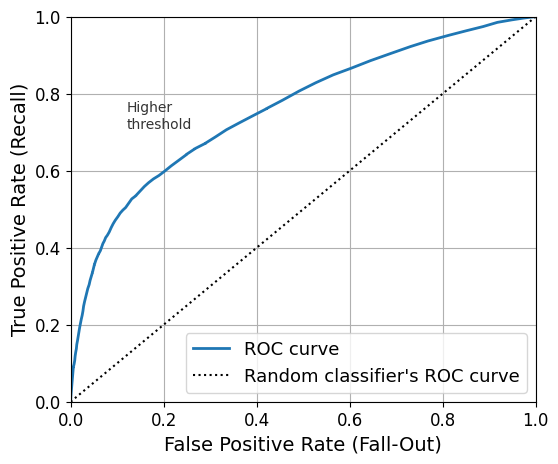

In [26]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# extra code – just beautifies and saves Figure 3–7

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [27]:
roc_auc_score(y_train, y_scores[:,1])

0.7610419133736724

In [28]:
# grid search for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

full_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("knn", KNeighborsClassifier()),
])
param_grid = {
    'knn__n_neighbors': [3, 4, 5, 7, 10, 20, 50]
    }

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3)
grid_search.fit(train_set, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 4, 5, 7, 10, 20, 50]})

In [29]:
grid_search.best_params_

{'knn__n_neighbors': 20}

In [30]:
# train knn using best estimator

knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [31]:
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=4)
knn_scores.mean()

0.8092916666666667

In [32]:
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_scores.mean()

0.8098749999999999

In [33]:
y_scores = cross_val_predict(knn_clf, X_train, y_train, cv=4, method="predict_proba")

In [34]:
y_scores

array([[0.9 , 0.1 ],
       [0.7 , 0.3 ],
       [0.95, 0.05],
       ...,
       [0.85, 0.15],
       [0.7 , 0.3 ],
       [0.95, 0.05]])

In [35]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])

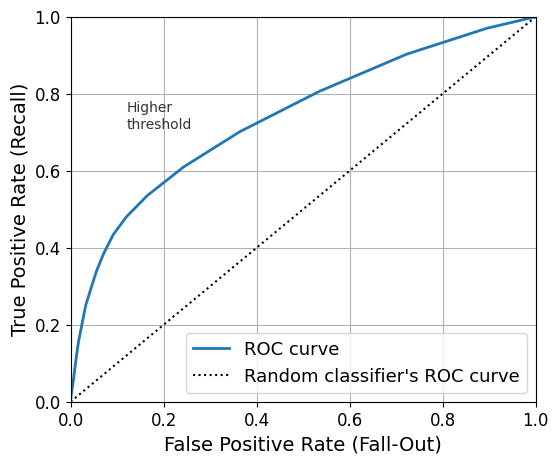

In [36]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# extra code – just beautifies and saves Figure 3–7

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [37]:
roc_auc_score(y_train, y_scores[:,1])

0.7393116860477172

#### Conclusions?

Explain your results and choices

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

### Conclusions
